## initiation and preparation
___

In [1]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf, erfc, erfcinv
from scipy.optimize import minimize

from mpl_toolkits.mplot3d import Axes3D
from cell_library import loadparams

In [9]:
# TC = np.load('data\\ExpTF_exc_Nstp40_new.npy').T
# RE = np.load('data\\ExpTF_inh_Nstp40_new.npy').T
# FS = np.load('./data/ExpTF_cortex_tau_e_4_inh_Nstp20.npy').T
# RS= np.load('./data/ExpTF_cortex_tau_e_4_exc_Nstp20.npy').T

FS=np.load(f'/DATA/Maria/fede_tau/data/ExpTF_inh_Nstp60_tau_e_4_b_30_vol2.npy').T
RS=np.load(f'/DATA/Maria/fede_tau/data/ExpTF_exc_Nstp60_tau_e_4_b_30_vol2.npy').T

ve = np.linspace(0, 40, 60)
vi = np.linspace(0, 170, 60)

vve, vvi = np.meshgrid(ve, vi)

In [10]:
RS

array([[  0.,   1.,   5., ..., 147., 147., 149.],
       [  0.,   0.,   4., ..., 146., 147., 147.],
       [  0.,   0.,   2., ..., 145., 146., 147.],
       ...,
       [  0.,   0.,   0., ...,  66.,  59.,  58.],
       [  0.,   0.,   0., ...,  53.,  62.,  61.],
       [  0.,   0.,   0., ...,  57.,  54.,  52.]])

Text(0, 0.5, 'vout TC')

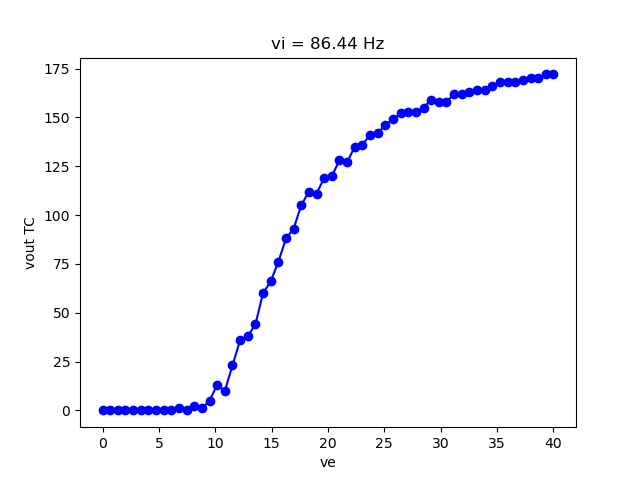

In [13]:
i = 30 # choose inhibitory input
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ve, FS[i], '-ob')
ax.set_title(f'vi = {vi[i]:.2f} Hz')
ax.set_xlabel('ve')
ax.set_ylabel('vout TC')

# # plt.plot(ve, TC[i], '-ob')
# plt.plot(ve, FS[i], '-ob')
# plt.title(f'vi = {vi[i]:.2f} Hz')
# plt.xlabel('ve')
# plt.ylabel('vout TC')

Text(0, 0.5, 'vout TC')

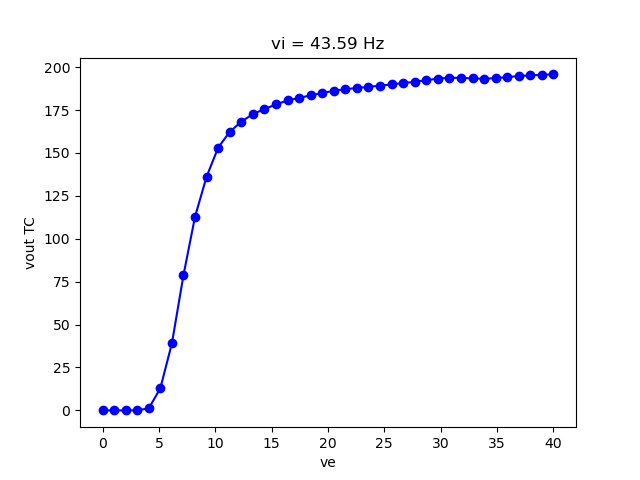

In [301]:
i = 10 # choose inhibitory input
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ve, FS[i], '-ob')
ax.set_title(f'vi = {vi[i]:.2f} Hz')
ax.set_xlabel('ve')
ax.set_ylabel('vout TC')

# # plt.plot(ve, TC[i], '-ob')
# plt.plot(ve, FS[i], '-ob')
# plt.title(f'vi = {vi[i]:.2f} Hz')
# plt.xlabel('ve')
# plt.ylabel('vout TC')

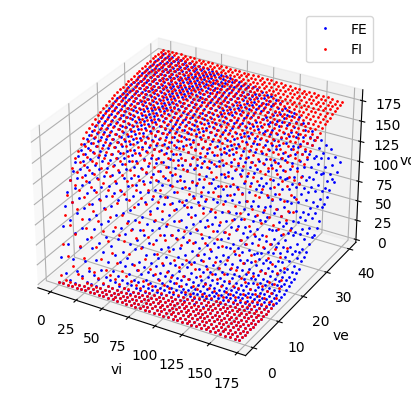

In [100]:
ax = plt.axes(projection='3d')
ax.plot3D(vvi.flatten(), vve.flatten(), TC.flatten(), 'ob', markersize=1,label='FE')
ax.plot3D(vvi.flatten(), vve.flatten(), RE.flatten(), 'or', markersize=1,label='FI')

ax.set_xlabel('vi')
ax.set_ylabel('ve')
ax.set_zlabel('vout')
ax.legend();

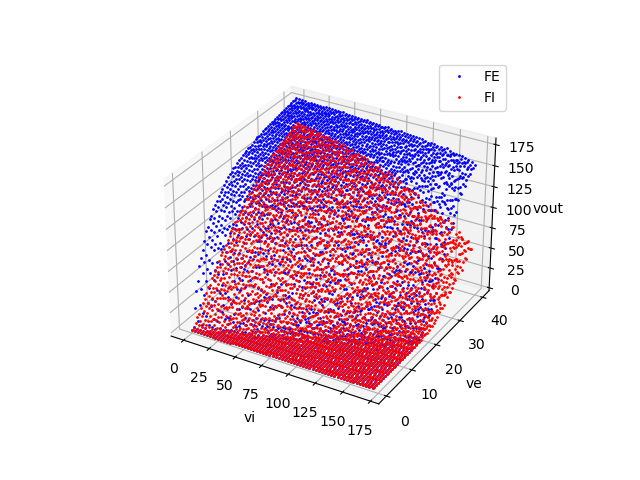

In [16]:
# Create a new figure
fig = plt.figure()

# Create axes for the 3D plot
ax = fig.add_subplot(111, projection='3d')

# Plot the data
ax.plot3D(vvi.flatten(), vve.flatten(), FS.flatten(), 'ob', markersize=1, label='FE')
ax.plot3D(vvi.flatten(), vve.flatten(), RS.flatten(), 'or', markersize=1, label='FI')

# Set labels for the axes
ax.set_xlabel('vi')
ax.set_ylabel('ve')
ax.set_zlabel('vout')

# Add a legend
ax.legend()

# Display the plot
plt.show()

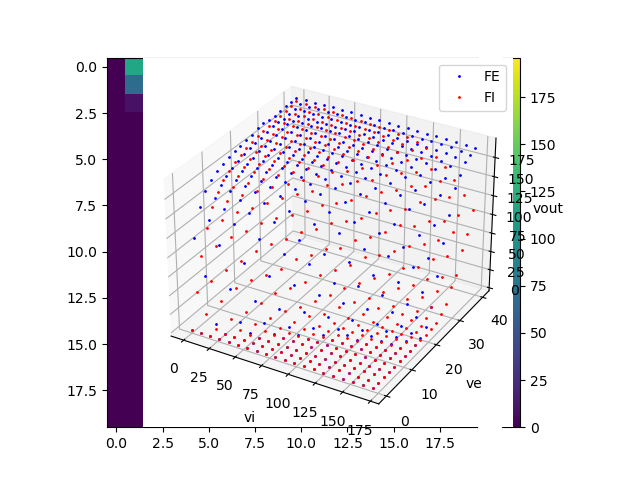

In [94]:
ax = plt.axes(projection='3d')
ax.plot3D(vvi.flatten(), vve.flatten(), FS.flatten(), 'ob', markersize=1,label='FE')
ax.plot3D(vvi.flatten(), vve.flatten(), RS.flatten(), 'or', markersize=1,label='FI')

ax.set_xlabel('vi')
ax.set_ylabel('ve')
ax.set_zlabel('vout')
ax.legend();
plt.show()

In [87]:
FS.shape

(20, 20)

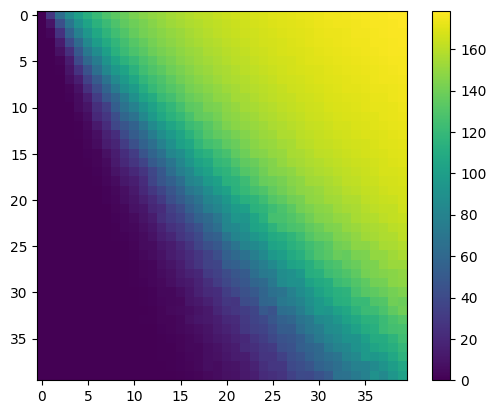

In [101]:
plt.imshow(TC)
plt.colorbar()

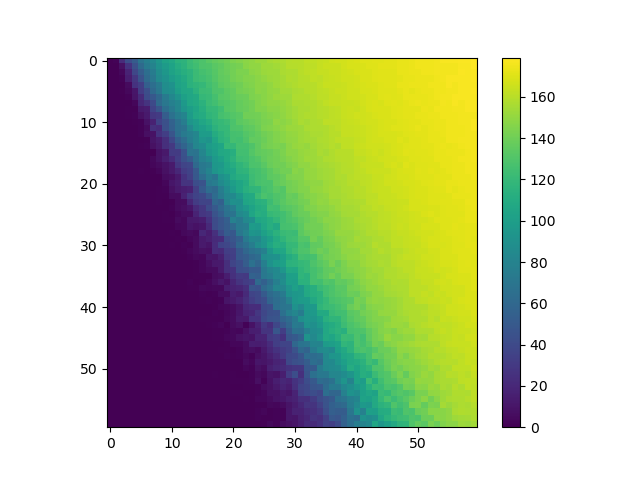

In [17]:

# Create a new figure
fig = plt.figure()

# Create axes for the plot
ax1 = fig.add_subplot(111)

# Plot the image and store the returned mappable object
image = ax1.imshow(FS)

# Add a colorbar using the mappable object
plt.colorbar(image)

# Display the plot
plt.show()

In [304]:
# params = loadparams('thalamus_ACh')
params = loadparams('cortex_updown')

In [305]:
params['FS']

{'P': array([-0.05184978,  0.0061593 , -0.01403522,  0.00166511, -0.0020559 ,
         0.00656668,  0.00171829,  0.00318432, -0.04516385, -0.03112775]),
 'Nexc': 400,
 'Ninh': 100,
 'Qe': 1.5e-09,
 'Qi': 5e-09,
 'Cm': 2e-10,
 'El': -0.065,
 'Gl': 1e-08,
 'Tw': 0.5,
 'a': 0,
 'b': 0.0,
 'Ti': 0.005,
 'Te': 0.005,
 'Ee': 0,
 'Ei': -0.08}

In [306]:
params['RS']

{'P': array([-0.05017034,  0.00451531, -0.00794377, -0.00208418, -0.00054697,
         0.00194753,  0.00274079,  0.00341614, -0.01066769, -0.01156433]),
 'Nexc': 400,
 'Ninh': 100,
 'Qe': 1.5e-09,
 'Qi': 5e-09,
 'Cm': 2e-10,
 'El': -0.064,
 'Gl': 1e-08,
 'Tw': 0.5,
 'a': 0.0,
 'b': 3e-11,
 'Ti': 0.005,
 'Te': 0.005,
 'Ee': 0,
 'Ei': -0.08}

In [31]:
params['TC']

{'P': array([-0.0473077 ,  0.00168071,  0.00097111, -0.00346337,  0.000475  ,
        -0.00167624, -0.00645524,  0.00343409, -0.00114066,  0.00018571]),
 'Nexc': 800,
 'Ninh': 25,
 'Qe': 1e-09,
 'Qi': 6e-09,
 'Cm': 1.6e-10,
 'El': -0.065,
 'Gl': 1e-08,
 'Tw': 0.2,
 'a': 0,
 'b': 1e-11,
 'Ti': 0.005,
 'Te': 0.005,
 'Ee': 0,
 'Ei': -0.08}

## theory and functions
___

$ \mu_{Ge}(\nu_e,\nu_i)=\nu_eK_e\tau_eQ_e $

$ \mu_{Gi}(\nu_e,\nu_i)=\nu_iK_i\tau_iQ_i $

$ \mu_G(\nu_e,\nu_i)=\mu_{Ge}+\mu_{Gi}+g_L $

$ \tau_m^\text{eff}(\nu_e,\nu_i)=\frac{C_m}{\mu_G} $

$ \mu_V=\frac{\mu_{Ge}E_e+\mu_{Gi}E_i+g_LE_L-w}{\mu_G} $

$ \mu_V=\frac{\mu_{Ge}E_e+\mu_{Gi}E_i+g_LE_L-\nu_\text{out}\tau_wb+aE_L}{\mu_G+a} $

$ \sigma_V(\nu_e,\nu_i)=\sqrt{\sum_sK_s\nu_s\frac{(U_s\cdot\tau_s)^2}{2(\tau_m^\text{eff}+\tau_s)}} $

$ \tau_V(\nu_e,\nu_i)=\left(\frac{\sum_sK_s\nu_s(U_s\cdot\tau_s)^2}{\sum_sK_s\nu_s(U_s\cdot\tau_s)^2/(\tau_m^\text{eff}+\tau_s)}\right) $

$ U_s=\frac{Q_s}{\mu_G}(E_s-\mu_V) $

$ \nu_\text{out}=\frac{1}{2\tau_V}\cdot\text{Erfc}\left(\frac{V_\text{thr}^\text{eff}-\mu_V}{\sqrt{2}\sigma_V}\right) $

$ V_\text{thr}^\text{eff}(\mu_V,\sigma_V,\tau_V^N)=P_0+\sum_{x\in\{\mu_V,\sigma_V,\tau_V^N\}}P_x\cdot\left(\frac{x-x^0}{\delta x^0}\right)+\sum_{x,y\in\{\mu_V,\sigma_V,\tau_V^N\}^2}P_{xy}\cdot\left(\frac{x-x^0}{\delta x^0}\right)\left(\frac{y-y^0}{\delta y^0}\right) $

$ \text{MPF}:(\nu_e,\nu_i)\longrightarrow(\mu_V,\sigma_V,\tau_V,\tau_V^N) $

In [307]:
def MPF(typ,fexc,finh,fout):

    p = params[ typ ]
    P,Nexc,Ninh,Qe,Qi,Cm,El = p.P,p.Nexc,p.Ninh,p.Qe,p.Qi,p.Cm,p.El
    a,b,Tw,Gl,Te,Ti,Ee,Ei = p.a,p.b,p.Tw,p.Gl,p.Te,p.Ti,p.Ee,p.Ei

    fexc[fexc<1e-9]=1e-9
    fe = fexc*Nexc
    finh[finh<1e-9]=1e-9
    fi = finh*Ninh


    muGi = Qi*Ti*fi
    muGe = Qe*Te*fe
    muG = Gl+muGe+muGi
    muV = (muGe*Ee+muGi*Ei+Gl*El - fout*Tw*b + a*El)/(muG+a)
    
    
    muGn = muG/Gl
    Tm = Cm/muG
    
    Ue =  Qe/muG*(Ee-muV)
    Ui = Qi/muG*(Ei-muV)

    sV = np.sqrt(fe*(Ue*Te)*(Ue*Te)/2./(Te+Tm)+fi*(Ui*Ti)*(Ui*Ti)/2./(Ti+Tm))

    Tv = ( fe*(Ue*Te)*(Ue*Te) + fi*(Qi*Ui)*(Qi*Ui)) /( fe*(Ue*Te)*(Ue*Te)/(Te+Tm) + fi*(Qi*Ui)*(Qi*Ui)/(Ti+Tm) )
    TvN = Tv*Gl/Cm

    return muV, sV, Tv, TvN

In [126]:
# test MPF function
typ = 'TC'
xe, xi = 4, 30

m, s, t, _ = MPF(typ, np.array([xe]), np.array([xi]), 0)
print(f'MPF_{typ}: (ve={xe}, vi={xi})Hz -> (mu={m[0]*1e3:.2f}, sigma={s[0]*1e3:.2f}, tau={t[0]*1e3:.2f})mV')

MPF_TC: (ve=4, vi=30)Hz -> (mu=-50.52, sigma=4.50, tau=8.30)mV


In [102]:
# test MPF function
typ = 'FS'
xe, xi = 4, 30

m, s, t, _ = MPF(typ, np.array([xe]), np.array([xi]), 0)
print(f'MPF_{typ}: (ve={xe}, vi={xi})Hz -> (mu={m[0]*1e3:.2f}, sigma={s[0]*1e3:.2f}, tau={t[0]*1e3:.2f})mV')

MPF_FS: (ve=4, vi=30)Hz -> (mu=-68.56, sigma=2.24, tau=7.06)mV


In [308]:
# test MPF function
typ = 'RS'
xe, xi = 4, 30

m, s, t, _ = MPF(typ, np.array([xe]), np.array([xi]), 0)
print(f'MPF_{typ}: (ve={xe}, vi={xi})Hz -> (mu={m[0]*1e3:.2f}, sigma={s[0]*1e3:.2f}, tau={t[0]*1e3:.2f})mV')

MPF_RS: (ve=4, vi=30)Hz -> (mu=-68.45, sigma=2.25, tau=7.06)mV


In [103]:
#====== calculate MPF for TC/RE =======

#-choose here the neuron typ:
typ = 'TC'

exec(f'FF={typ}')
muV, sV, Tv, TvN = MPF(typ, vve, vvi, FF)

NameError: name 'TC' is not defined

In [309]:
#====== calculate MPF for TC/RE =======

#-choose here the neuron typ:
typ = 'FS'

exec(f'FF={typ}')
muV, sV, Tv, TvN = MPF(typ, vve, vvi, FF)

In [196]:
#====== calculate MPF for TC/RE =======

#-choose here the neuron typ:
typ = 'RS'

exec(f'FF={typ}')
muV, sV, Tv, TvN = MPF(typ, vve, vvi, FF)

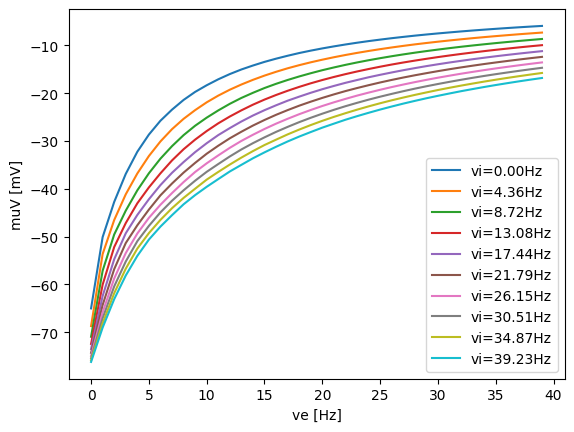

In [105]:
for i in range(10):
    plt.plot(muV[i]*1e3,label=f'vi={vi[i]:.2f}Hz')

plt.xlabel('ve [Hz]')
plt.ylabel('muV [mV]')
plt.legend();

In [106]:
muV[0]

array([-0.065     , -0.03983871, -0.02872093, -0.02245455, -0.01843284,
       -0.01563291, -0.01357143, -0.01199029, -0.01073913, -0.00972441,
       -0.00888489, -0.00817881, -0.00757669, -0.00705714, -0.00660428,
       -0.00620603, -0.00585308, -0.00553812, -0.00525532, -0.005     ])

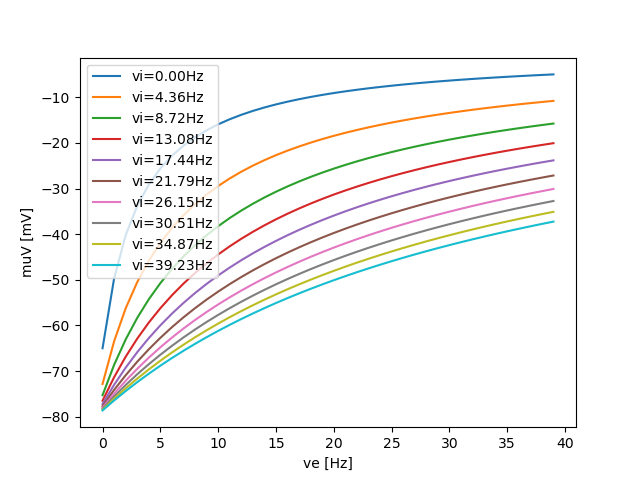

In [310]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(10):
    ax.plot(range(len(muV[i])),muV[i]*1e3,label=f'vi={vi[i]:.2f}Hz')

ax.set_xlabel('ve [Hz]')
ax.set_ylabel('muV [mV]')
ax.legend();
# plt.show()

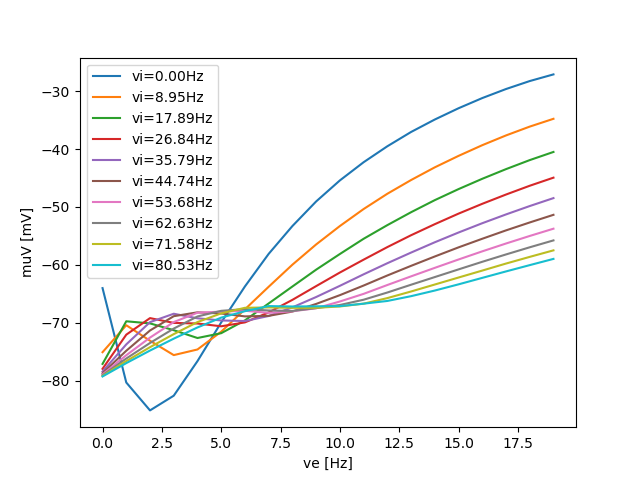

In [197]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(10):
    ax.plot(range(len(muV[i])),muV[i]*1e3,label=f'vi={vi[i]:.2f}Hz')

ax.set_xlabel('ve [Hz]')
ax.set_ylabel('muV [mV]')
ax.legend();
# plt.show()

In [311]:
def pheV(fout, muV, sV, Tv):
    fout[fout<0]=1e-9
    Tv[Tv<0]=1e-9
    return np.sqrt(2)*sV * erfcinv( 2*Tv*fout ) + muV # Zerlaut 2017
    # return np.sqrt(2)*sV * erfcinv( Tv*fout ) + muV # to widen the definition range

Text(0, 0.5, 'Veff [mV]')

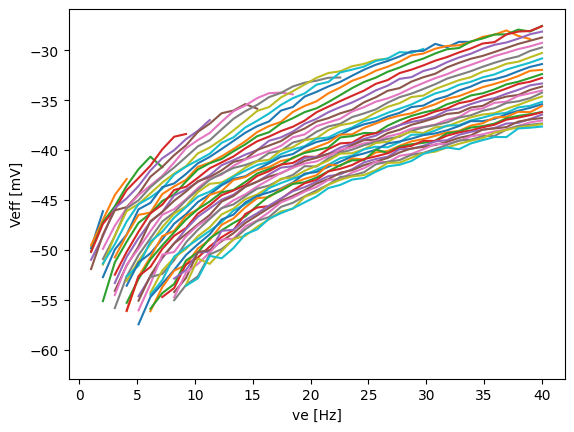

In [119]:
#====== calculate phenomenological V_thr^eff ======
Veff = pheV(FF, muV, sV, Tv)

for i in range(len(vi)):
    plt.plot(ve, Veff[i]*1e3,label=f'vi={vi[i]:.2f}Hz')

plt.xlabel('ve [Hz]')
plt.ylabel('Veff [mV]')
# plt.legend(loc=(1.2,-1.2));

Text(0, 0.5, 'Veff [mV]')

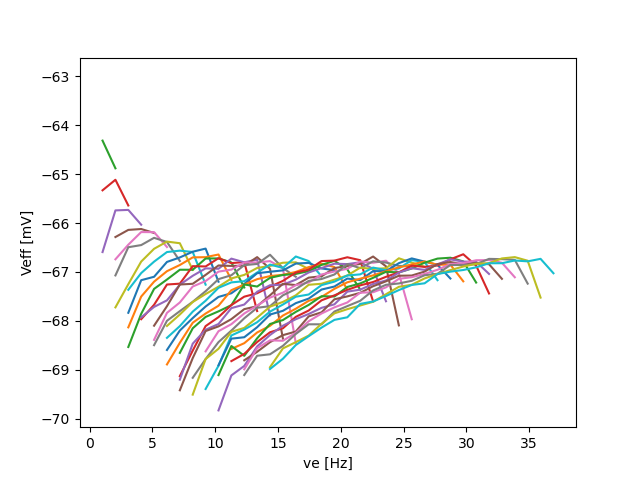

In [312]:
#====== calculate phenomenological V_thr^eff ======
Veff = pheV(FF, muV, sV, Tv)

fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(len(vi)):
    ax.plot(ve, Veff[i]*1e3,label=f'vi={vi[i]:.2f}Hz')

ax.set_xlabel('ve [Hz]')
ax.set_ylabel('Veff [mV]')
# plt.legend(loc=(1.2,-1.2));

Text(0, 0.5, 'Veff [mV]')

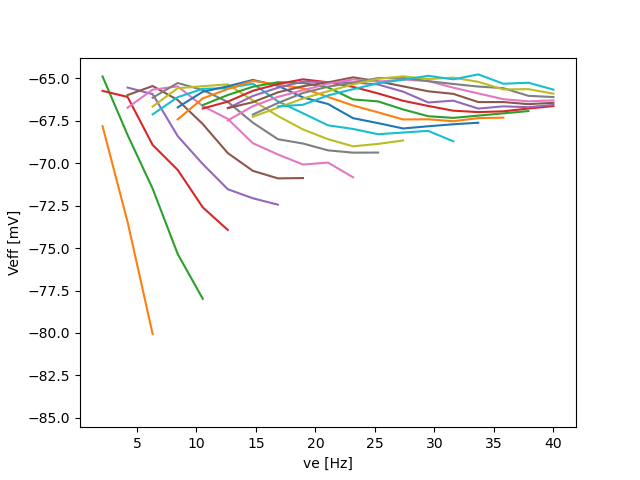

In [198]:
#====== calculate phenomenological V_thr^eff ======
Veff = pheV(FF, muV, sV, Tv)

fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(len(vi)):
    ax.plot(ve, Veff[i]*1e3,label=f'vi={vi[i]:.2f}Hz')

ax.set_xlabel('ve [Hz]')
ax.set_ylabel('Veff [mV]')
# plt.legend(loc=(1.2,-1.2));

In [313]:
import pandas as pd
df = pd.DataFrame(Veff)

In [323]:
pd.set_option('display.max_columns', None)

In [325]:
df

0         1         2         3         4         5         6         7   \
0   inf       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1   inf -0.062960       NaN       NaN       NaN       NaN       NaN       NaN   
2   inf -0.064314 -0.064880       NaN       NaN       NaN       NaN       NaN   
3   inf -0.065330 -0.065114 -0.065640       NaN       NaN       NaN       NaN   
4   inf -0.066593 -0.065741 -0.065731 -0.066033       NaN       NaN       NaN   
5   inf       inf -0.066286 -0.066140 -0.066122 -0.066202       NaN       NaN   
6   inf       inf -0.066741 -0.066442 -0.066184 -0.066186 -0.066490       NaN   
7   inf       inf -0.067071 -0.066494 -0.066450 -0.066302 -0.066387 -0.066775   
8   inf       inf -0.067724 -0.067250 -0.066788 -0.066526 -0.066379 -0.066412   
9   inf       inf       inf -0.067365 -0.067023 -0.066789 -0.066592 -0.066564   
10  inf       inf       inf -0.067835 -0.067168 -0.067098 -0.066795 -0.066703   
11  inf       inf       inf -0.068133 -0.067503 -0.067198 -0.066984 -0.066858   
12  inf       inf       inf -0.068535 -0.067857 -0.067346 -0.067155 -0.066954   
13  inf       inf       inf       inf -0.067966 -0.067672 -0.067257 -0.067239   
14  inf       inf       inf       inf -0.067929 -0.067715 -0.067581 -0.067261   
15  inf       inf       inf       inf       inf -0.068099 -0.067700 -0.067256   
16  inf       inf       inf       inf       inf -0.068389 -0.067837 -0.067624   
17  inf       inf       inf       inf       inf -0.068497 -0.067998 -0.067801   
18  inf       inf       inf       inf       inf       inf -0.068104 -0.067870   
19  inf       inf       inf       inf       inf       inf -0.068347 -0.068108   
20  inf       inf       inf       inf       inf       inf -0.068596 -0.068197   
21  inf       inf       inf       inf       inf       inf -0.068891 -0.068448   
22  inf       inf       inf       inf       inf       inf       inf -0.068655   
23  inf       inf       inf       inf       inf       inf       inf -0.069130   
24  inf       inf       inf       inf       inf       inf       inf -0.069203   
25  inf       inf       inf       inf       inf       inf       inf -0.069420   
26  inf       inf       inf       inf       inf       inf       inf       inf   
27  inf       inf       inf       inf       inf       inf       inf       inf   
28  inf       inf       inf       inf       inf       inf       inf       inf   
29  inf       inf       inf       inf       inf       inf       inf       inf   
30  inf       inf       inf       inf       inf       inf       inf       inf   
31  inf       inf       inf       inf       inf       inf       inf       inf   
32  inf       inf       inf       inf       inf       inf       inf       inf   
33  inf       inf       inf       inf       inf       inf       inf       inf   
34  inf       inf       inf       inf       inf       inf       inf       inf   
35  inf       inf       inf       inf       inf       inf       inf       inf   
36  inf       inf       inf       inf       inf       inf       inf       inf   
37  inf       inf       inf       inf       inf       inf       inf       inf   
38  inf       inf       inf       inf       inf       inf       inf       inf   
39  inf       inf       inf       inf       inf       inf       inf       inf   

          8         9         10        11        12        13        14  \
0        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
5        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
6        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
7        NaN       NaN       NaN       NaN       NaN       NaN       NaN   

In [119]:
Veff.shape

(20, 20)

In [128]:
# remove dimension so that no NaN entries are there anymore
# ONLY important for fitting the Vthr

if typ=='TC': idx = '[15:38,8:35]'
elif typ=='RE': idx = '[20:40,10:]'

exec(f"Veff_fit = Veff{idx}")
exec(f"TC_fit = TC{idx}")
exec(f"RE_fit = RE{idx}")
exec(f"muV_fit = muV{idx}")
exec(f"sV_fit = sV{idx}")
exec(f"Tv_fit = Tv{idx}")
exec(f"TvN_fit = TvN{idx}")
Veff_fit.shape

(23, 27)

In [202]:
# remove dimension so that no NaN entries are there anymore
# ONLY important for fitting the Vthr

if typ=='FS': idx = '[10:,6:10]'
elif typ=='RS': idx = '[9:19,7:16]'

exec(f"Veff_fit = Veff{idx}")
exec(f"TC_fit = FS{idx}")
exec(f"RS_fit = RS{idx}")
exec(f"muV_fit = muV{idx}")
exec(f"sV_fit = sV{idx}")
exec(f"Tv_fit = Tv{idx}")
exec(f"TvN_fit = TvN{idx}")
Veff_fit.shape

(10, 9)

In [124]:
# remove dimension so that no NaN entries are there anymore
# ONLY important for fitting the Vthr

if typ=='FS': idx = '[12:,6:12]'
elif typ=='RE': idx = '[20:40,10:]'

exec(f"Veff_fit = Veff{idx}")
exec(f"TC_fit = FS{idx}")
exec(f"RE_fit = RS{idx}")
exec(f"muV_fit = muV{idx}")
exec(f"sV_fit = sV{idx}")
exec(f"Tv_fit = Tv{idx}")
exec(f"TvN_fit = TvN{idx}")
Veff_fit.shape

(8, 6)

In [326]:
typ

'FS'

In [327]:
# remove dimension so that no NaN entries are there anymore
# ONLY important for fitting the Vthr

if typ=='FS': idx = '[26:35,11:25]'
elif typ=='RE': idx = '[20:40,10:]'

exec(f"Veff_fit = Veff{idx}")
exec(f"TC_fit = FS{idx}")
exec(f"RE_fit = RS{idx}")
exec(f"muV_fit = muV{idx}")
exec(f"sV_fit = sV{idx}")
exec(f"Tv_fit = Tv{idx}")
exec(f"TvN_fit = TvN{idx}")
Veff_fit.shape

(9, 14)

In [328]:
Veff_fit

array([[-0.0680673 , -0.06784899, -0.06768812, -0.06752392, -0.06742416,
        -0.06726979, -0.06721487, -0.06705109, -0.06698994, -0.06693443,
        -0.06678476, -0.06681178, -0.06676976, -0.06702999],
       [-0.06819817, -0.06794754, -0.06773227, -0.0676995 , -0.06747784,
        -0.06734972, -0.0671828 , -0.06714394, -0.06705127, -0.06683829,
        -0.06692159, -0.06678166, -0.06680758, -0.06687583],
       [-0.06822477, -0.06814441, -0.06793326, -0.06770936, -0.06761249,
        -0.0674784 , -0.06726201, -0.06724097, -0.06715686, -0.06707173,
        -0.06691233, -0.06693795, -0.0669243 , -0.06672037],
       [-0.06829869, -0.06817832, -0.06802803, -0.06781025, -0.06766607,
        -0.06750649, -0.06746111, -0.06726856, -0.0671974 , -0.06707273,
        -0.06704892, -0.06691059, -0.0669645 , -0.06692878],
       [-0.06836411, -0.06833491, -0.06812995, -0.06787067, -0.06779463,
        -0.06763782, -0.06754494, -0.06735956, -0.06729774, -0.06713486,
        -0.06716629, -0.06

In [2]:
lol1 = np.linspace(0, 150, 20)

In [3]:
lol2 = np.linspace(0, 150, 39)

In [4]:
lol1

array([  0.        ,   7.89473684,  15.78947368,  23.68421053,
        31.57894737,  39.47368421,  47.36842105,  55.26315789,
        63.15789474,  71.05263158,  78.94736842,  86.84210526,
        94.73684211, 102.63157895, 110.52631579, 118.42105263,
       126.31578947, 134.21052632, 142.10526316, 150.        ])

In [5]:
lol2

array([  0.        ,   3.94736842,   7.89473684,  11.84210526,
        15.78947368,  19.73684211,  23.68421053,  27.63157895,
        31.57894737,  35.52631579,  39.47368421,  43.42105263,
        47.36842105,  51.31578947,  55.26315789,  59.21052632,
        63.15789474,  67.10526316,  71.05263158,  75.        ,
        78.94736842,  82.89473684,  86.84210526,  90.78947368,
        94.73684211,  98.68421053, 102.63157895, 106.57894737,
       110.52631579, 114.47368421, 118.42105263, 122.36842105,
       126.31578947, 130.26315789, 134.21052632, 138.15789474,
       142.10526316, 146.05263158, 150.        ])

In [1]:
import numpy as np

In [10]:
lol1 = np.linspace(0, 150, 20)
lol2 = np.linspace(0, 150, 39)
lol3 = [lol2[2*i+1] for i in range(len(lol1)-1)]

In [11]:
lol3

[3.9473684210526314,
 11.842105263157894,
 19.736842105263158,
 27.63157894736842,
 35.526315789473685,
 43.421052631578945,
 51.315789473684205,
 59.21052631578947,
 67.10526315789474,
 75.0,
 82.89473684210526,
 90.78947368421052,
 98.68421052631578,
 106.57894736842105,
 114.47368421052632,
 122.36842105263158,
 130.26315789473685,
 138.1578947368421,
 146.05263157894737]

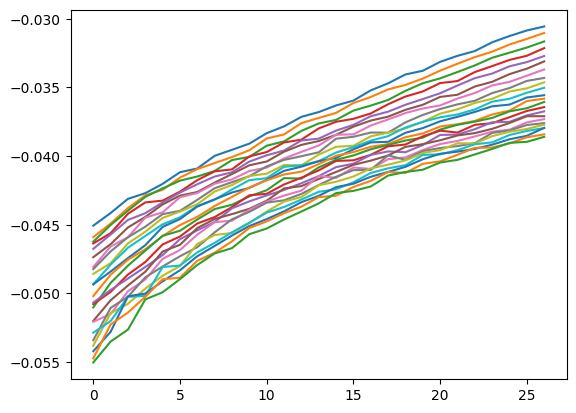

In [129]:
plt.plot(Veff_fit.T);

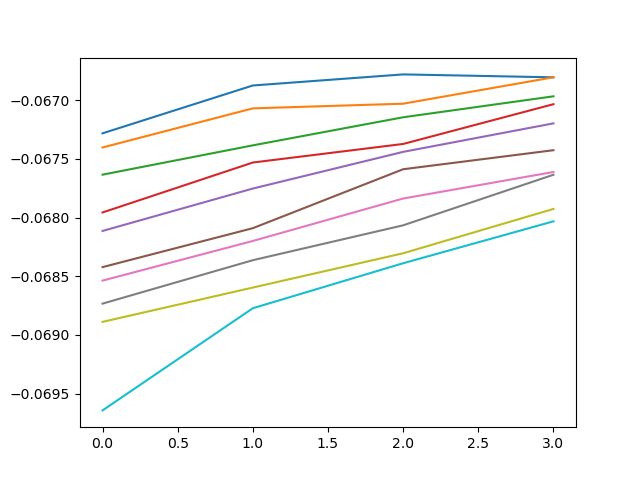

In [132]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Veff_fit.T);
# plt.show()

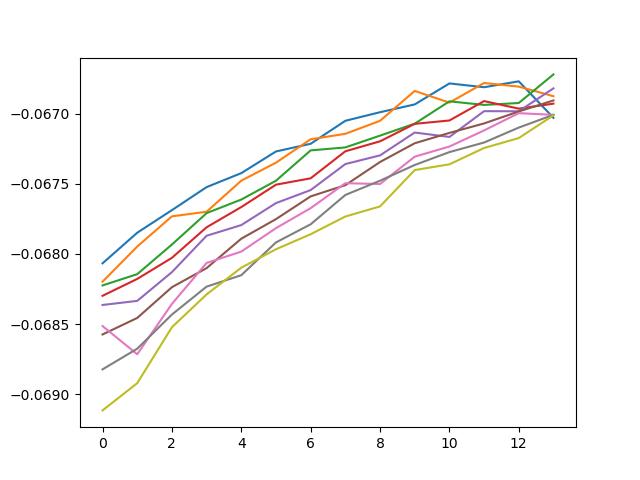

In [329]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Veff_fit.T);
# plt.show()

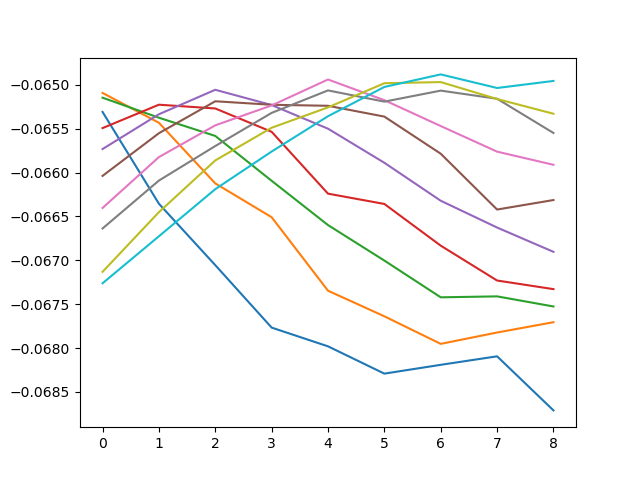

In [203]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Veff_fit.T);
# plt.show()

## fitting and results
___

#### fitting first order to find correct global minimum

In [246]:
path = "/DATA/Maria/fede_tau/Network_Simulations/taui_taue_exploration/"
fname = "dead_durat_-65_-64_amp_1.npy"
dead_dur = np.load(path+fname)
dead_dur = np.squeeze(dead_dur)
tauIv=np.arange(5.,9.,step=1)
bvals = np.arange(0, 16, 2)

print(dead_dur.shape, tauIv.shape, bvals.shape)


(4, 8) (4,) (8,)


In [258]:
path = "/DATA/Maria/fede_tau/Network_Simulations/taui_taue_exploration/"
fname = "dead_durat_-65_-63_amp_1.npy"
dead_dur = np.load(path+fname)
dead_dur = np.squeeze(dead_dur).T
tauIv=np.arange(5.,10.,step=1)
bvals = np.arange(0, 16, 2)

print(dead_dur.shape, tauIv.shape, bvals.shape)

(8, 5) (5,) (8,)


In [278]:
path = "/DATA/Maria/fede_tau/Network_Simulations/taui_taue_exploration/"
file ="dead_durat_-65_-64_amp_3.npy"

dur3 = np.load(path+file)

In [279]:
dur3

array([[[3165, 3165, 1060, 1525,  185,  270,  175,  170],
        [1095,  505,  775,  295,  135,  115,   40,   25],
        [  65,   15,   25,  140,   25,   30,   20,   20],
        [  40,   45,   10,   45,    0,   40,    0,    0],
        [   0,   15,   20,   30,   15,    5,   15,    5],
        [3165, 3165,  620,  580,  180,  285,   65,   45],
        [3165,  265,  110,   55,  180,   45,   35,   10],
        [ 175,   30,   50,   20,   40,   25,   45,   15],
        [  30,   90,   15,   25,   25,   15,   20,   15],
        [  10,   20,   25,   30,    5,   10,   15,   10],
        [3165, 3165,  670,  220,  365,   30,   95,   65],
        [3165,  565,  260,   90,   75,   25,   25,   20],
        [  60,   25,   40,  110,   15,   30,   20,   25],
        [  30,   15,   45,   30,   20,   25,   10,   20],
        [  10,   20,   10,   10,   20,    5,    0,   20]]])

In [277]:
dur2

array([[[3165, 3165, 1060, 1525,  185,  270,  175,  170],
        [1095,  505,  775,  295,  135,  115,   40,   25],
        [  65,   15,   25,  140,   25,   30,   20,   20],
        [  40,   45,   10,   45,    0,   40,    0,    0],
        [   0,   15,   20,   30,   15,    5,   15,    5],
        [3165, 3165,  620,  580,  180,  285,   65,   45],
        [3165,  265,  110,   55,  180,   45,   35,   10],
        [ 175,   30,   50,   20,   40,   25,   45,   15],
        [  30,   90,   15,   25,   25,   15,   20,   15],
        [  10,   20,   25,   30,    5,   10,   15,   10]]])

In [275]:
dur1

array([[[3165, 3165, 1060, 1525,  185,  270,  175,  170],
        [1095,  505,  775,  295,  135,  115,   40,   25],
        [  65,   15,   25,  140,   25,   30,   20,   20],
        [  40,   45,   10,   45,    0,   40,    0,    0],
        [   0,   15,   20,   30,   15,    5,   15,    5]]])

In [289]:
dur3[10:,:]

array([[3165, 3165,  670,  220,  365,   30,   95,   65],
       [3165,  565,  260,   90,   75,   25,   25,   20],
       [  60,   25,   40,  110,   15,   30,   20,   25],
       [  30,   15,   45,   30,   20,   25,   10,   20],
       [  10,   20,   10,   10,   20,    5,    0,   20]])

In [285]:
dur3.shape


(15, 8)

In [281]:
dur1 = np.squeeze(dur1)
dur2 = np.squeeze(dur2)
dur3 = np.squeeze(dur3)

In [290]:
dur3=dur3[10:,:]
dur2=dur2[5:,:]

In [282]:
dur1

array([[3165, 3165, 1060, 1525,  185,  270,  175,  170],
       [1095,  505,  775,  295,  135,  115,   40,   25],
       [  65,   15,   25,  140,   25,   30,   20,   20],
       [  40,   45,   10,   45,    0,   40,    0,    0],
       [   0,   15,   20,   30,   15,    5,   15,    5]])

In [291]:
tauIv=np.arange(5.,10.,step=1)
bvals = np.arange(0, 16, 2)

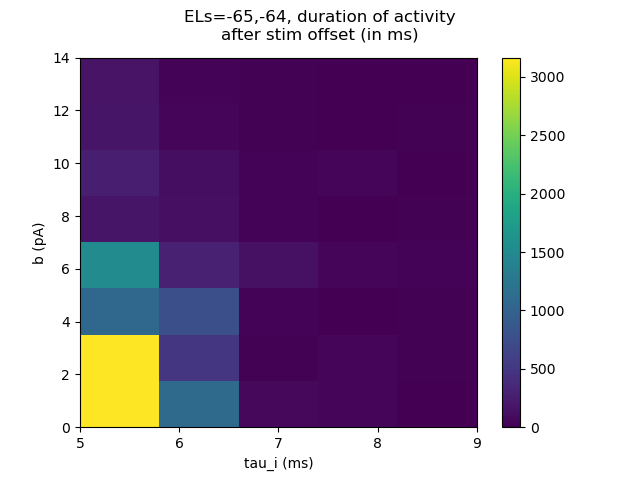

In [292]:
fig=plt.figure()
ax = fig.add_subplot(111)
# Create a grid of coordinates for the colormap
X, Y = np.meshgrid(tauIv, bvals)

# Plot the colormap
img = ax.imshow(dur1.T, extent=[tauIv.min(), tauIv.max(), bvals.min(), bvals.max()],
           origin='lower', aspect='auto', cmap='viridis')
fig.colorbar(img)
fig.suptitle("ELs=-65,-64, duration of activity\nafter stim offset (in ms)")

# Set the axis labels
ax.set_xlabel('tau_i (ms)')
ax.set_ylabel('b (pA)')
ax.set_xticks(tauIv)

In [383]:
path = "/DATA/Maria/fede_tau/Network_Simulations/taui_taue_exploration/"

amp = 3

file =f"dead_durat_-65_-63_amp_{amp}.npy"

dur = np.load(path+file)
dur = np.squeeze(dur)

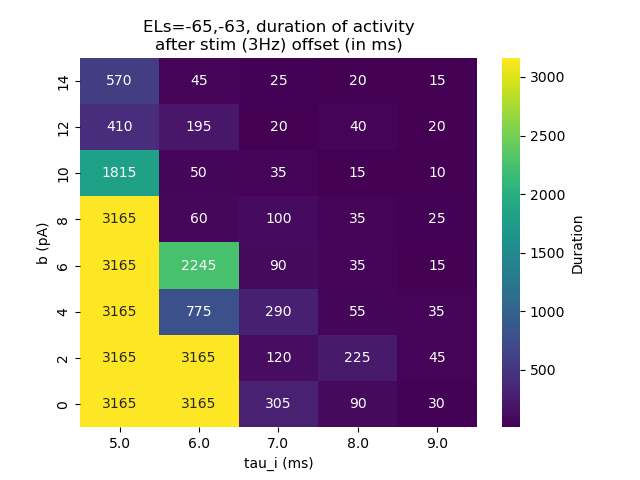

In [384]:
# import seaborn as sns
# plot
fig=plt.figure()
X, Y = np.meshgrid(tauIv, bvals[::-1])
ax = fig.add_subplot(111)
tauIv=np.arange(5.,10.,step=1)
bvals = np.arange(0, 16, 2)
sns.heatmap(dur.T, annot=True, fmt='d', cmap='viridis', cbar=True, ax=ax,xticklabels=tauIv, yticklabels=bvals)

# Add colorbar and title
cbar = ax.collections[0].colorbar
cbar.set_label('Duration')
ax.set_title(f"ELs=-65,-63, duration of activity\nafter stim ({amp}Hz) offset (in ms)")

# Set the axis labels
ax.set_xlabel('tau_i (ms)')
# ax.set_xticks(tauIv)
ax.set_ylabel('b (pA)')
# ax.set_yticks(bvals)
ax.invert_yaxis()


plt.show()

plt.savefig(f"/DATA/Maria/fede_tau/Network_Simulations/taui_taue_exploration/els_-65_-63_amp_{amp}.png")

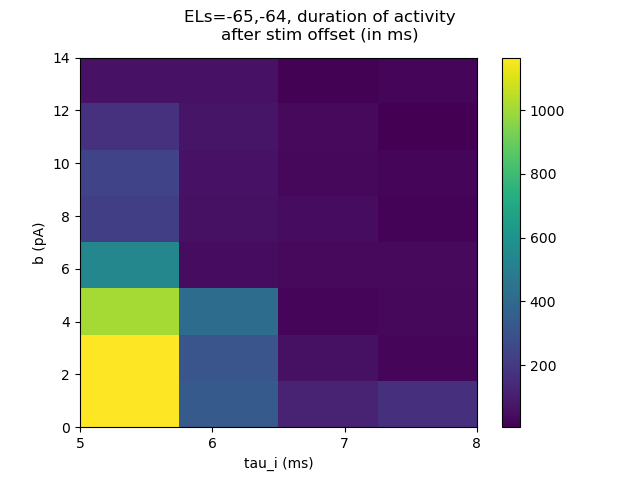

In [253]:
fig=plt.figure()
ax = fig.add_subplot(111)
# Create a grid of coordinates for the colormap
X, Y = np.meshgrid(tauIv, bvals)

# Plot the colormap
img = ax.imshow(dead_dur.T, extent=[tauIv.min(), tauIv.max(), bvals.min(), bvals.max()],
           origin='lower', aspect='auto', cmap='viridis')
fig.colorbar(img)
fig.suptitle("ELs=-65,-64, duration of activity\nafter stim offset (in ms)")

# Set the axis labels
ax.set_xlabel('tau_i (ms)')
ax.set_ylabel('b (pA)')
ax.set_xticks(tauIv)

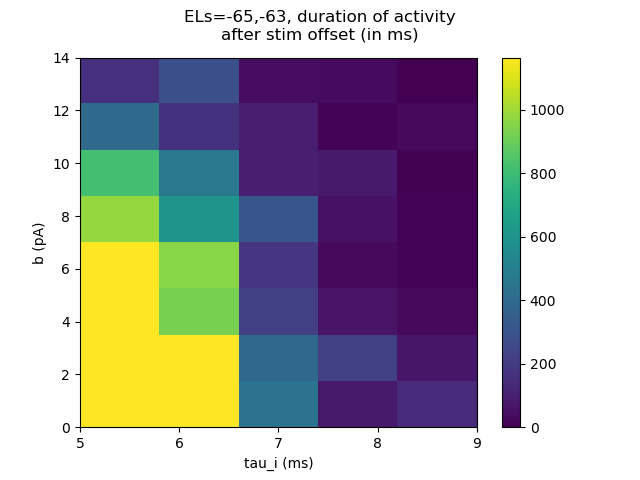

In [261]:
fig=plt.figure()
ax = fig.add_subplot(111)
# Create a grid of coordinates for the colormap
X, Y = np.meshgrid(tauIv, bvals)

# Plot the colormap
img = ax.imshow(dead_dur, extent=[tauIv.min(), tauIv.max(), bvals.min(), bvals.max()],
           origin='lower', aspect='auto', cmap='viridis')
fig.colorbar(img)
fig.suptitle("ELs=-65,-63, duration of activity\nafter stim offset (in ms)")

# Set the axis labels
ax.set_xlabel('tau_i (ms)')
ax.set_ylabel('b (pA)')
ax.set_xticks(tauIv)

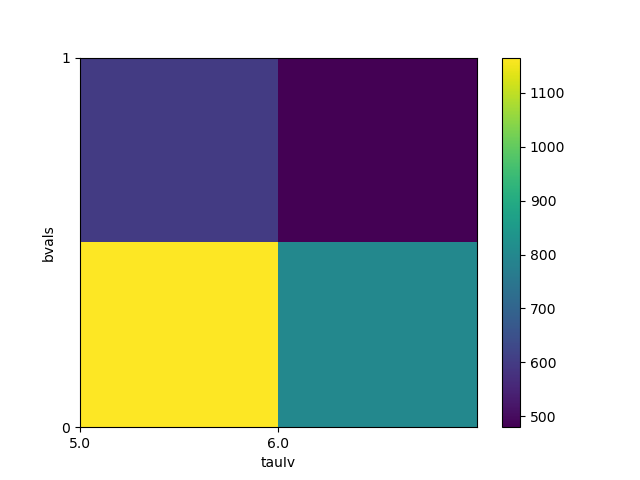

In [244]:
import numpy as np
import matplotlib.pyplot as plt

tauIv=np.arange(5.,7.,step=1)
bvals = np.arange(0, 2, 1)

dead_dur =[[1165, 800], [600, 480]]
# Convert the lists to numpy arrays
# tauIv = np.array([5.,6.])
# bvals = np.array([0,2])
dead_dur = np.array(dead_dur)

fig=plt.figure()
ax = fig.add_subplot(111)
# Create a grid of coordinates for the colormap
X, Y = np.meshgrid(tauIv, bvals)

# Plot the colormap
img = ax.imshow(dead_dur, extent=[tauIv.min(), tauIv.max(), bvals.min(), bvals.max()],
           origin='lower', aspect='auto', cmap='viridis')
fig.colorbar(img)

# Set the axis labels
ax.set_xlabel('tauIv')
ax.set_ylabel('bvals')
ax.set_xticks(ticks=np.arange(5., 6, 0.5),labels=tauIv)
ax.set_yticks(ticks = bvals, labels=bvals)
# ax.set_xticklabels(tauIv)
# ax.set_yticklabels(bvals)

# Show the plot
# plt.show()


In [330]:
# calculating the effective threshold potential with a general second order polynomial of the membrane moments (mu,sigma,tau)

def Vthre(P, muV, sV, TvN):
    # normalizing moments:
    muV0 = -60e-3;
    DmuV0 = 10e-3;
    sV0 = 4e-3;
    DsV0 = 6e-3;
    TvN0 = 0.5;
    DTvN0 = 1.;
    
    # first order polynomial
    Vo1 = P[0] + P[1]*(muV-muV0)/DmuV0 + P[2]*(sV-sV0)/DsV0 + P[3]*(TvN-TvN0)/DTvN0
    # second order polynomial
    Vo2 = P[4]*((muV-muV0)/DmuV0)*((muV-muV0)/DmuV0) + P[5]*(muV-muV0)/DmuV0*(sV-sV0)/DsV0 + P[6]*(muV-muV0)/DmuV0*(TvN-TvN0)/DTvN0 + P[7]*((sV-sV0)/DsV0)*((sV-sV0)/DsV0) + P[8]*(sV-sV0)/DsV0*(TvN-TvN0)/DTvN0  + P[9]*((TvN-TvN0)/DTvN0)*((TvN-TvN0)/DTvN0);

    return Vo1 + Vo2
    

In [153]:
# fitting first order Vthr on the phenomenological threshold space

def Res(P): return np.mean( (Veff_fit - Vthre(np.concatenate([P,[0]*6]), muV_fit, sV_fit, TvN_fit))**2 )

res = minimize(Res, [Veff_fit.mean(),1e-3,1e-3,1e-3], method='nelder-mead', tol=1e-20, options={'disp':True,'maxiter':20000})
# res = minimize(Res, [Veff_fit.mean(),1e-3,1e-3,1e-3], method='SLSQP', tol=1e-32, options={'disp':True,'maxiter':20000})

P1 = np.array(res.x)
print(P1)

[-0.05330784  0.0051353   0.00636002 -0.03086307]


C:\Users\jover\AppData\Local\Temp\ipykernel_9208\1219303345.py:5: RuntimeWarning: Maximum number of iterations has been exceeded.
  res = minimize(Res, [Veff_fit.mean(),1e-3,1e-3,1e-3], method='nelder-mead', tol=1e-20, options={'disp':True,'maxiter':20000})


In [331]:
# fitting first order Vthr on the phenomenological threshold space

def Res(P): return np.mean( (Veff_fit - Vthre(np.concatenate([P,[0]*6]), muV_fit, sV_fit, TvN_fit))**2 )

res = minimize(Res, [Veff_fit.mean(),1e-3,1e-3,1e-3], method='nelder-mead', tol=1e-20, options={'disp':True,'maxiter':40000})
# res = minimize(Res, [Veff_fit.mean(),1e-3,1e-3,1e-3], method='SLSQP', tol=1e-32, options={'disp':True,'maxiter':20000})

P1 = np.array(res.x)
print(P1)

[-0.08943188 -0.0039894   0.05770915 -0.19723358]


/tmp/ipykernel_25538/2857393854.py:5: RuntimeWarning: Maximum number of iterations has been exceeded.
  res = minimize(Res, [Veff_fit.mean(),1e-3,1e-3,1e-3], method='nelder-mead', tol=1e-20, options={'disp':True,'maxiter':40000})


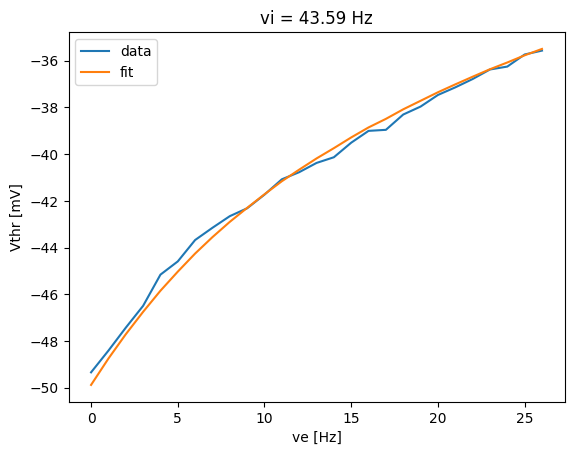

In [154]:
# checking the fit...

# choose vi:
i=10

plt.title(f'vi = {vi[i]:.2f} Hz')

plt.plot(Veff_fit[i]*1e3, label='data')
plt.plot(Vthre(np.concatenate([P1,[0]*6]), muV_fit, sV_fit, TvN_fit)[i]*1e3, label='fit')
plt.xlabel('ve [Hz]')
plt.ylabel('Vthr [mV]')
plt.legend();


In [129]:
Veff_fit.shape

(8, 6)

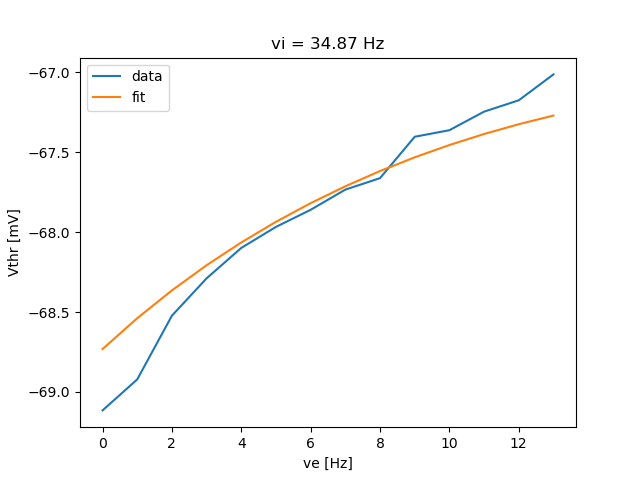

In [332]:
# checking the fit...

# choose vi:
i=8
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_title(f'vi = {vi[i]:.2f} Hz')

ax.plot(Veff_fit[i]*1e3, label='data')
ax.plot(Vthre(np.concatenate([P1,[0]*6]), muV_fit, sV_fit, TvN_fit)[i]*1e3, label='fit')
ax.set_xlabel('ve [Hz]')
ax.set_ylabel('Vthr [mV]')
ax.legend();


___
skippable 

In [155]:
# fit the second order parameters on Vthre ( not necessary most of the time!!!! -> SKIP )
def Res(P): return np.mean( (Veff_fit - Vthre(np.concatenate([P1,P]), muV_fit, sV_fit, TvN_fit))**2 )

res = minimize(Res, [1e-9]*6, method='nelder-mead', tol=1e-15, options={'disp':True,'maxiter':20000})
# res = minimize(Res, [0]*6, method='SLSQP', options={'ftol':1e-20,'disp':True,'maxiter':20000})

P2 = np.array(res.x)
print(P2)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1332
         Function evaluations: 2202
[ 2.12321162e-05 -5.51879833e-03  4.75010955e-03 -1.24710725e-02
 -1.17091516e-02  2.03790312e-02]


In [333]:
# fit the second order parameters on Vthre ( not necessary most of the time!!!! -> SKIP )
def Res(P): return np.mean( (Veff_fit - Vthre(np.concatenate([P1,P]), muV_fit, sV_fit, TvN_fit))**2 )

res = minimize(Res, [1e-9]*6, method='nelder-mead', tol=1e-15, options={'disp':True,'maxiter':20000})
# res = minimize(Res, [0]*6, method='SLSQP', options={'ftol':1e-20,'disp':True,'maxiter':20000})

P2 = np.array(res.x)
print(P2)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 661
         Function evaluations: 1174
[-0.00165828  0.00746112 -0.0040047  -0.00284435 -0.0010361  -0.00290632]


In [156]:
P = np.concatenate([P1,P2])

In [334]:
P = np.concatenate([P1,P2])

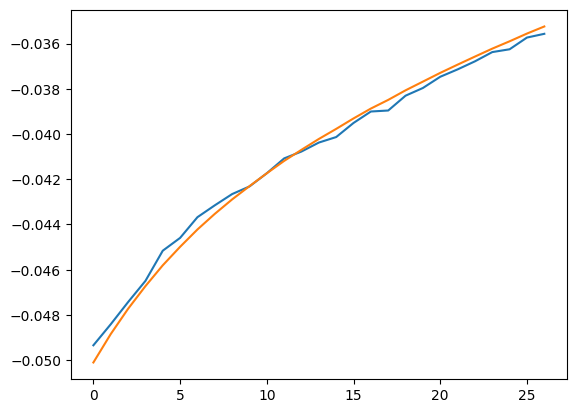

In [158]:
i =10
plt.plot(Veff_fit[i], label='data')
plt.plot(Vthre(P, muV_fit, sV_fit, TvN_fit)[i],label='fit')

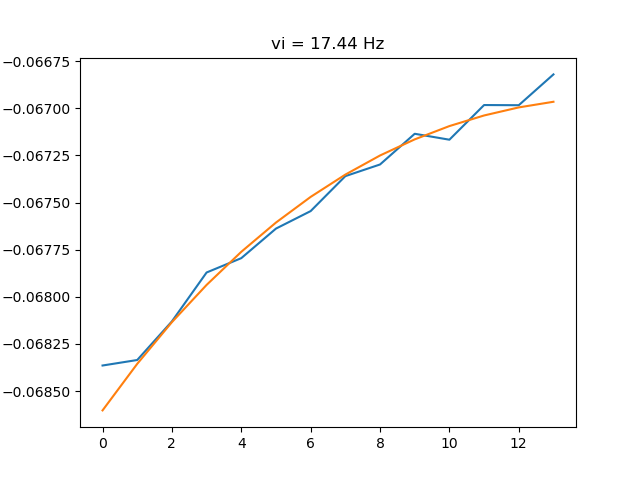

In [335]:
i =4
fig = plt.figure()

# Create axes for the 3D plot
ax = fig.add_subplot(111)
ax.set_title(f'vi = {vi[i]:.2f} Hz')

ax.plot(Veff_fit[i])
ax.plot(Vthre(P, muV_fit, sV_fit, TvN_fit)[i])

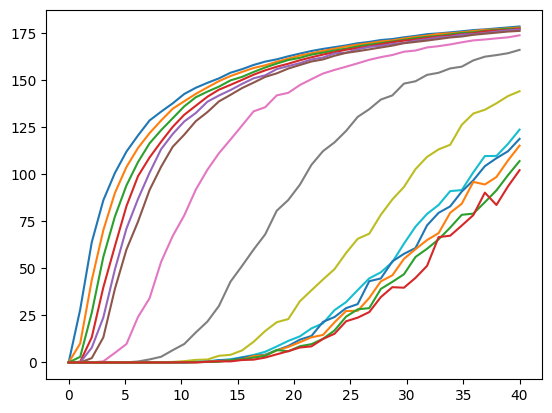

In [163]:
# choose a subspace to fit the firing rate and transfer function ( not necessary BUT produces better results most of the time )
# IMPPORTANT if a subspace in firing rate input is more interesting or badly fitted without doing this ...

red = [0,5,8,9,10,11,12,13,14,15,19,20,21,22,23,24,25,30,39]
# rid = [0,20,30,35,36,37,38,39]
rid = [0,1,2,3,4,5,10,20,30,35,36,37,38,39]
# rid = [0,1,2,3,4,5,6,7,8,9,10]

plt.plot(ve,FF[rid].T);

skippable
___

In [336]:
# the transfer function
def TF(P, muV, sV, Tv, TvN):
    fout = 1/(2*Tv) * erfc( (Vthre(P, muV, sV, TvN) - muV)/(np.sqrt(2)*sV) )
    
    # fout = np.where(fout<0, 1e-9, fout)
    fout[fout<0]=0
    return fout

In [165]:
def Res(P):
    # return np.mean( (TC_fit - TF(P, muV_fit, sV_fit, Tv_fit, TvN_fit))**2 )
    return np.mean( (FF - TF(P, muV, sV, Tv, TvN))**2 )
    # return np.mean( (FF[rid] - TF(P, muV[rid], sV[rid], Tv[rid], TvN[rid]))**2 )

# res = minimize(Res, P, method='nelder-mead', tol=1e-20, options={'disp':True,'maxiter':40000})
res = minimize(Res, np.concatenate([P1,[1e-6]*6]), method='nelder-mead', tol=1e-20, options={'disp':True,'maxiter':20000})
# res = minimize(Res, P, method='SLSQP', options={'ftol':1e-20,'disp':True,'maxiter':40000})

PP = np.array(res.x)
print(PP)

[-0.04889066  0.00286456  0.00257743 -0.00410812  0.00032246 -0.00239454
 -0.00464647  0.00068987  0.00520023  0.00263891]


C:\Users\jover\AppData\Local\Temp\ipykernel_9208\818737715.py:6: RuntimeWarning: Maximum number of iterations has been exceeded.
  res = minimize(Res, np.concatenate([P1,[1e-6]*6]), method='nelder-mead', tol=1e-20, options={'disp':True,'maxiter':20000})


In [337]:
def Res(P):
    # return np.mean( (TC_fit - TF(P, muV_fit, sV_fit, Tv_fit, TvN_fit))**2 )
    return np.mean( (FF - TF(P, muV, sV, Tv, TvN))**2 )
    # return np.mean( (FF[rid] - TF(P, muV[rid], sV[rid], Tv[rid], TvN[rid]))**2 )

# res = minimize(Res, P, method='nelder-mead', tol=1e-20, options={'disp':True,'maxiter':40000})
res = minimize(Res, np.concatenate([P1,[1e-6]*6]), method='nelder-mead', tol=1e-20, options={'disp':True,'maxiter':20000})
# res = minimize(Res, P, method='SLSQP', options={'ftol':1e-20,'disp':True,'maxiter':40000})

PP = np.array(res.x)
print(PP)

[-0.0677233  -0.0049107  -0.00876382  0.0108637  -0.00134275 -0.00291793
 -0.01596491 -0.0065683  -0.00096008  0.02384663]


/tmp/ipykernel_25538/3552097889.py:7: RuntimeWarning: Maximum number of iterations has been exceeded.
  res = minimize(Res, np.concatenate([P1,[1e-6]*6]), method='nelder-mead', tol=1e-20, options={'disp':True,'maxiter':20000})


In [166]:
TF(PP, muV, sV, Tv, TvN)[10]

array([8.10674165e-237, 1.89975196e-011, 8.83455573e-004, 2.34357773e-001,
       2.78624696e+000, 1.07442153e+001, 2.25387825e+001, 3.77543668e+001,
       5.17880862e+001, 6.64085708e+001, 8.02878250e+001, 9.21064266e+001,
       1.02853201e+002, 1.12269233e+002, 1.20418750e+002, 1.27284454e+002,
       1.33084005e+002, 1.38328689e+002, 1.42532004e+002, 1.46329206e+002,
       1.49461915e+002, 1.52190987e+002, 1.54559641e+002, 1.56648260e+002,
       1.58484829e+002, 1.60108751e+002, 1.61555549e+002, 1.62859140e+002,
       1.64039439e+002, 1.65109038e+002, 1.66094552e+002, 1.66996644e+002,
       1.67835332e+002, 1.68614099e+002, 1.69340858e+002, 1.70022695e+002,
       1.70665437e+002, 1.71272024e+002, 1.71846576e+002, 1.72391676e+002])

In [338]:
TF(PP, muV, sV, Tv, TvN)[10]

array([0.00000000e+00, 1.20343262e-16, 4.41498132e-06, 1.92506069e-02,
       1.13415920e+00, 1.06928242e+01, 3.85154532e+01, 7.91841918e+01,
       1.16154467e+02, 1.39919251e+02, 1.51728843e+02, 1.56678527e+02,
       1.58690014e+02, 1.59687750e+02, 1.60385114e+02, 1.60996314e+02,
       1.61575775e+02, 1.62135840e+02, 1.62679415e+02, 1.63207546e+02,
       1.63720930e+02, 1.64220183e+02, 1.64705882e+02, 1.65178571e+02,
       1.65638767e+02, 1.66086957e+02, 1.66523605e+02, 1.66949153e+02,
       1.67364017e+02, 1.67768595e+02, 1.68163265e+02, 1.68548387e+02,
       1.68924303e+02, 1.69291339e+02, 1.69649805e+02, 1.70000000e+02,
       1.70342205e+02, 1.70676692e+02, 1.71003717e+02, 1.71323529e+02])

vi = 87.18Hz


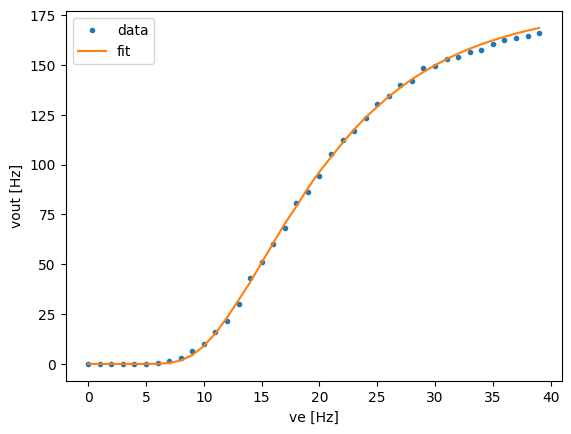

In [179]:
# compare fit

# choose vi...
i =20

print(f'vi = {vi[i]:.2f}Hz')

plt.plot(FF[i], 'o', ms=3, label='data')
plt.plot(TF(PP, muV, sV, Tv, TvN)[i], label='fit')

plt.xlabel('ve [Hz]')
plt.ylabel('vout [Hz]')
plt.legend();


vi = 4.36Hz
vi = 4.36Hz


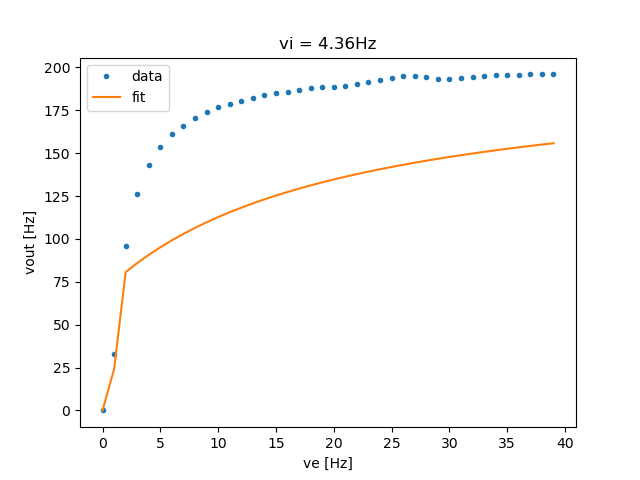

In [343]:
# compare fit

# choose vi...
i =1

print(f'vi = {vi[i]:.2f}Hz')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title(f'vi = {vi[i]:.2f}Hz')
print(f'vi = {vi[i]:.2f}Hz')

ax.plot(FF[i], 'o', ms=3, label='data')
ax.plot(TF(PP, muV, sV, Tv, TvN)[i], label='fit')

ax.set_xlabel('ve [Hz]')
ax.set_ylabel('vout [Hz]')
plt.legend();

vi = 0.00Hz
vi = 8.95Hz
vi = 17.89Hz
vi = 26.84Hz
vi = 35.79Hz
vi = 44.74Hz
vi = 53.68Hz
vi = 62.63Hz
vi = 71.58Hz
vi = 80.53Hz
vi = 89.47Hz
vi = 98.42Hz
vi = 107.37Hz
vi = 116.32Hz
vi = 125.26Hz
vi = 134.21Hz
vi = 143.16Hz
vi = 152.11Hz
vi = 161.05Hz


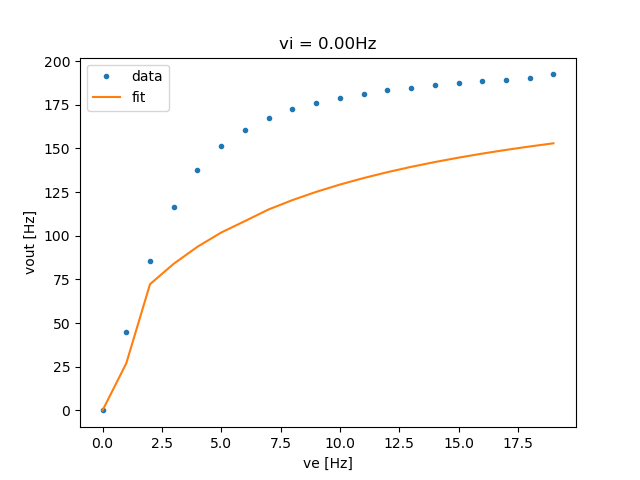

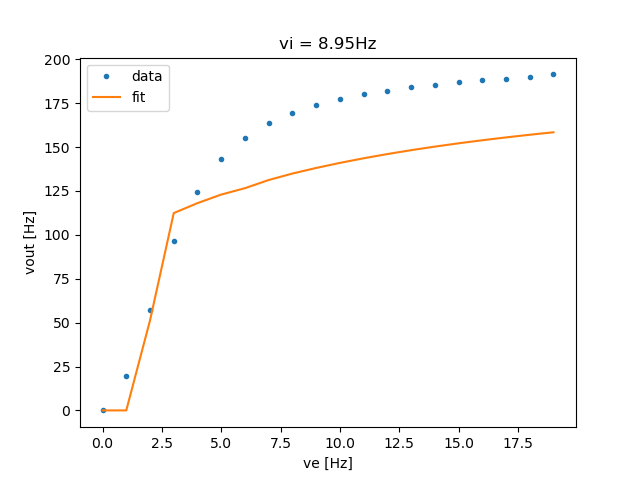

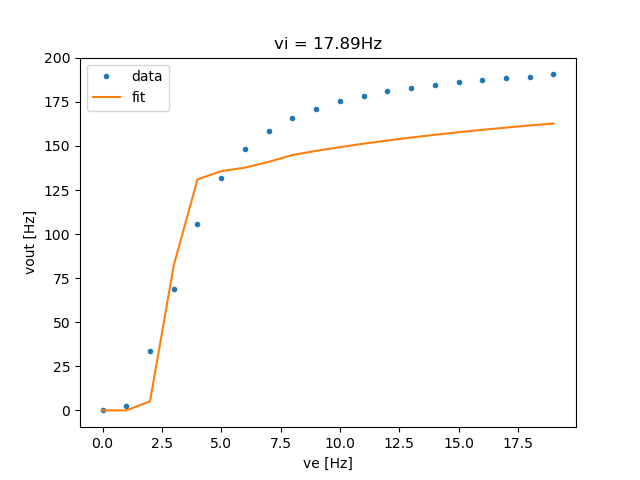

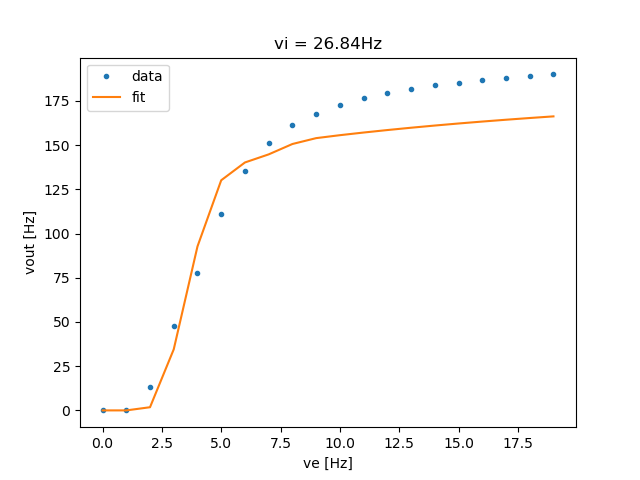

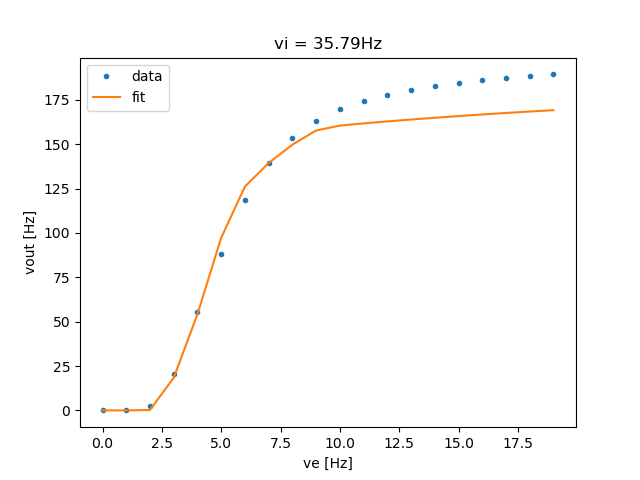

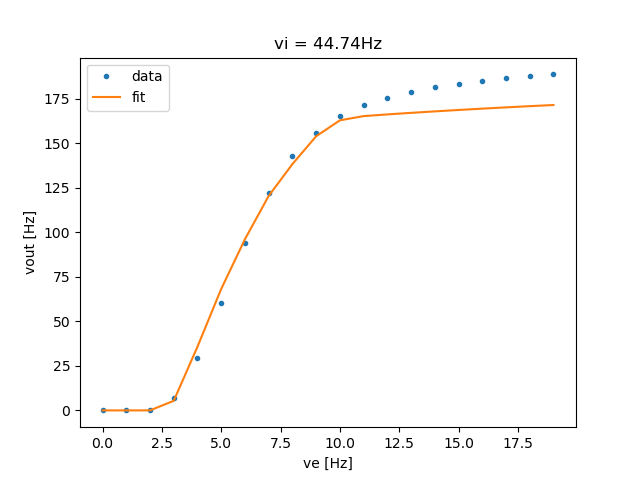

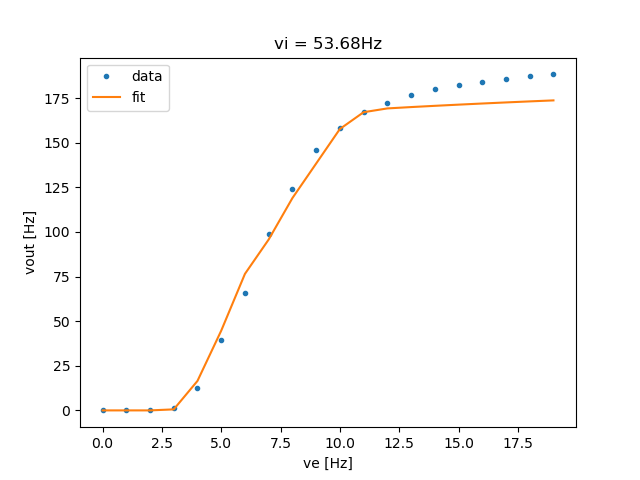

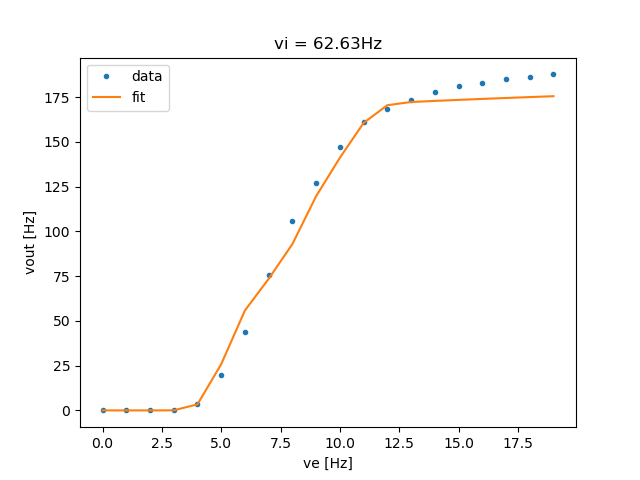

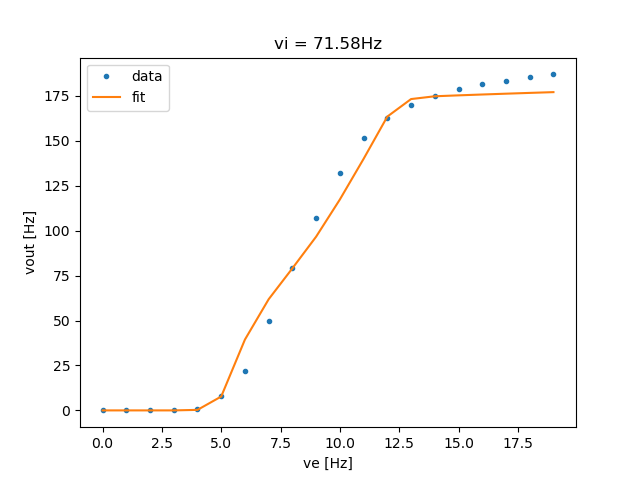

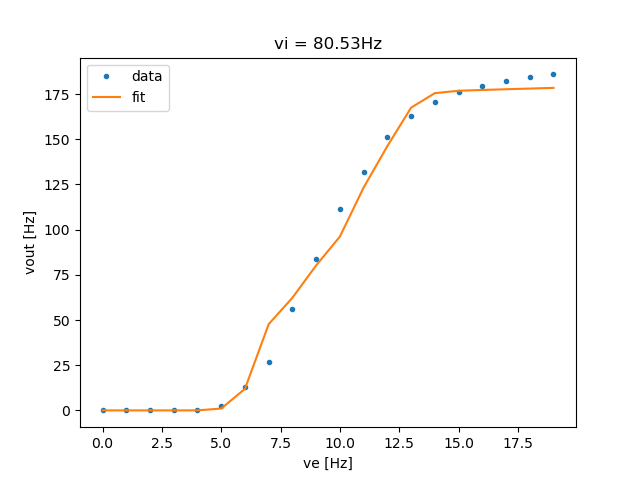

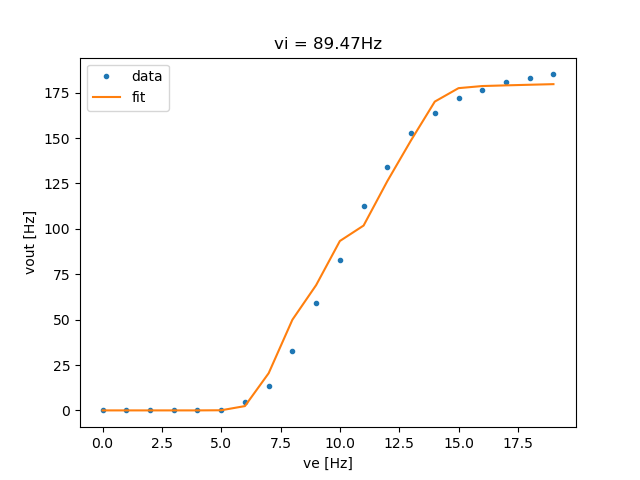

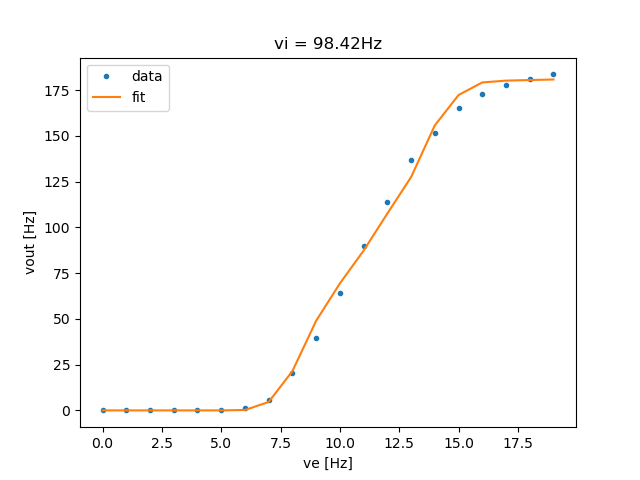

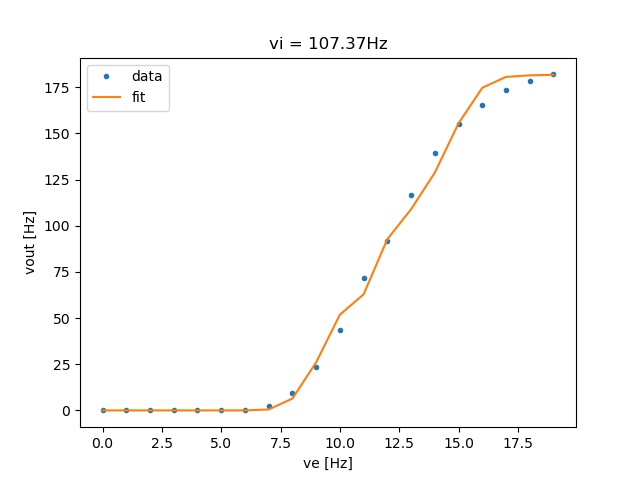

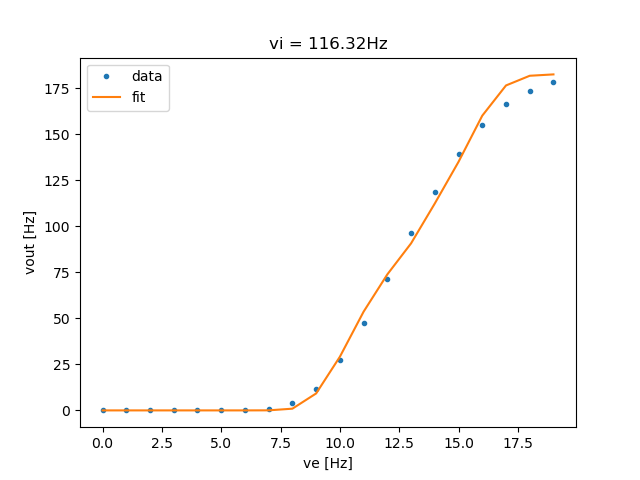

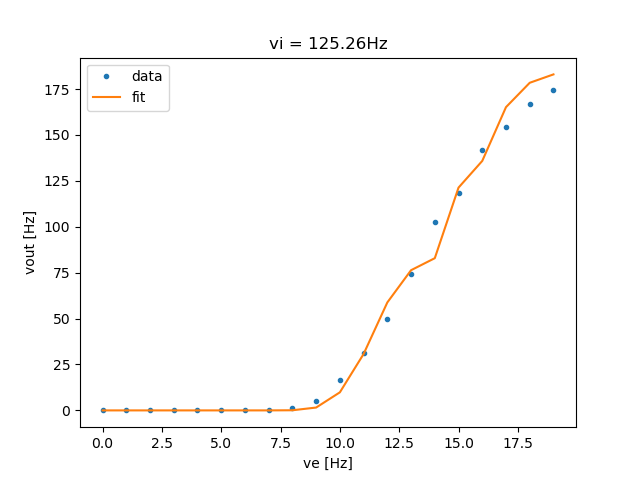

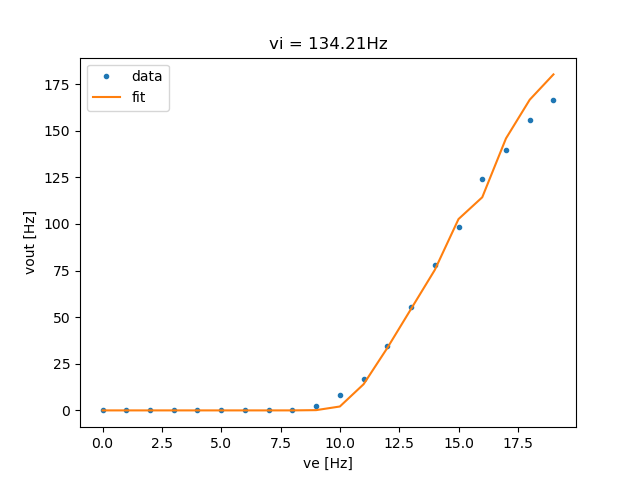

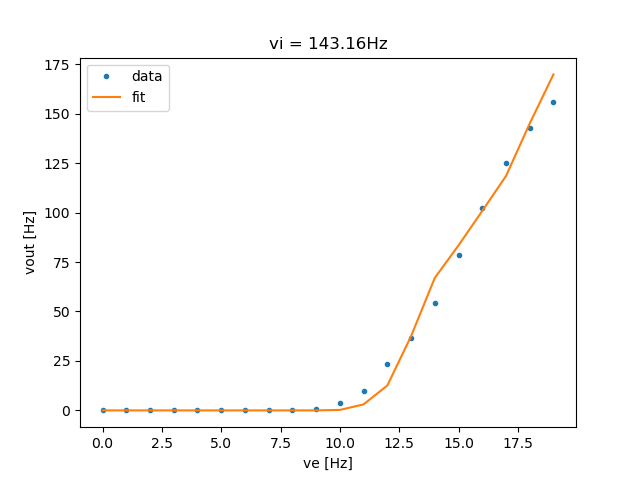

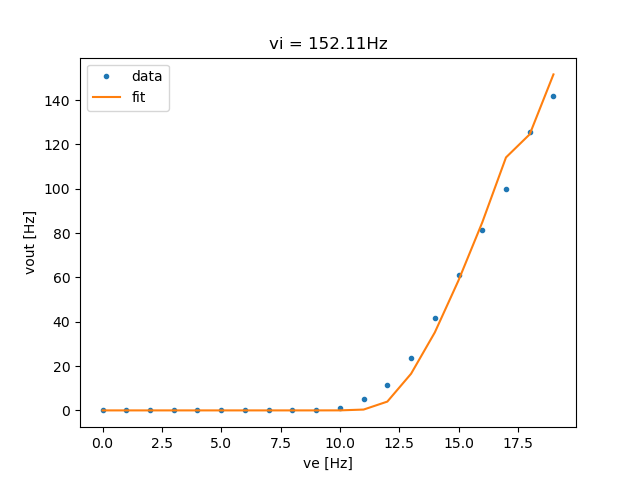

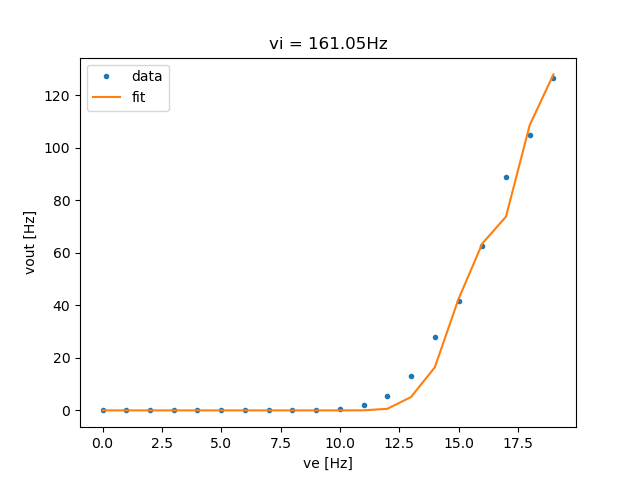

In [215]:
# compare fit

# choose vi...
#     i =0
for i in range(19):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title(f'vi = {vi[i]:.2f}Hz')
    print(f'vi = {vi[i]:.2f}Hz')

    ax.plot(FF[i], 'o', ms=3, label='data')
    ax.plot(TF(PP, muV, sV, Tv, TvN)[i], label='fit')

    ax.set_xlabel('ve [Hz]')
    ax.set_ylabel('vout [Hz]')
    plt.legend();


In [79]:
#===== SAVE fitted parameters ======

np.save(f'data\\FITparams_{typ}_exp.npy', PP)

In [216]:
#===== SAVE fitted parameters ======

np.save(f'./data/FITparams_{typ}_exp_20.npy', PP)

___
___
#### END (other ideas stuff beyond here + unimaginable horrors beyond your imagination)
___
___

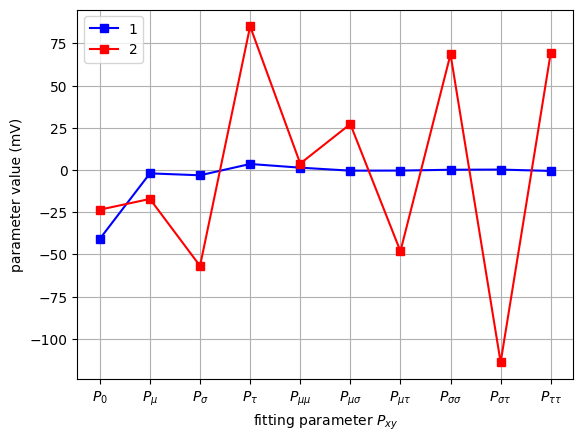

In [25]:
# pZ=np.load("C:\VSCode\DB_comparison\mf\data\FS-cell_CONFIG1_fit.npy")[[0,1,2,3,5,8,9,6,10,7]]
pppp2=np.load('data\\NEW6params_RE.npy')*1e3
pppp3=np.load('data\\NEW5params_RE.npy')*1e3
# pppp2=np.load('data\\NEW4params_RE.npy')
# pppp3=np.load('data\\NEW6params_RE.npy')
plt.plot(pppp2,'s-b',label='1')
plt.plot(pppp3,'s-r',label='2')
labels = ['$P_0$','$P_{\mu}$','$P_{\sigma}$','$P_{\\tau}$' , '$P_{\mu\mu}$','$P_{\mu\sigma}$','$P_{\mu\\tau}$','$P_{\sigma\sigma}$','$P_{\sigma\\tau}$','$P_{\\tau\\tau}$']
plt.xticks(range(len(labels)),labels);
plt.ylabel('parameter value (mV)')
plt.xlabel('fitting parameter $P_{xy}$')
plt.grid()
plt.legend()
# plt.savefig('gfx\\fitparams.png',dpi=200,bbox_inches='tight')

___

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
from mytools import ornstein_uhlenbeck

In [3]:
typ='TC'
PP = np.load(f'data\\NEW6params_{typ}.npy')

In [4]:
def TF2(P,fexc,finh,adapt, Nexc,Ninh,Qe,Qi,Cm,El, noise=1):

    fe = fexc*Nexc
    fi = finh*Ninh

    fe+=1e-9;
    fi+=1e-9;
    
    muGi = Qi*Ti*fi;
    muGe = Qe*Te*fe;
    muG = Gl+muGe+muGi;
    muV = (muGe*Ee+muGi*Ei+Gl*El-adapt)/muG;
    # muV = (muGe*Ee+muGi*Ei+Gl*El - fout*Tw*b + a*El)/(muG+a);
    
    
    muGn = muG/Gl;
    Tm = Cm/muG;
    
    Ue =  Qe/muG*(Ee-muV);
    Ui = Qi/muG*(Ei-muV);
    
    sV = np.sqrt(fe*(Ue*Te)*(Ue*Te)/2./(Te+Tm)+fi*(Ui*Ti)*(Ui*Ti)/2./(Ti+Tm));

    sV*=noise
    
    
    fe+=1e-9;
    fi+=1e-9;

    Tv = ( fe*(Ue*Te)*(Ue*Te) + fi*(Qi*Ui)*(Qi*Ui)) /( fe*(Ue*Te)*(Ue*Te)/(Te+Tm) + fi*(Qi*Ui)*(Qi*Ui)/(Ti+Tm) );
    TvN = Tv*Gl/Cm;
    
    muV0=-60e-3;
    DmuV0 = 10e-3;
    sV0 =4e-3;
    DsV0= 6e-3;
    TvN0=0.5;
    DTvN0 = 1.;

    vthre = P[0] + P[1]*(muV-muV0)/DmuV0 + P[2]*(sV-sV0)/DsV0 + P[3]*(TvN-TvN0)/DTvN0 \
    + P[4]*((muV-muV0)/DmuV0)*((muV-muV0)/DmuV0) + P[5]*(muV-muV0)/DmuV0*(sV-sV0)/DsV0 + P[6]*(muV-muV0)/DmuV0*(TvN-TvN0)/DTvN0 + P[7]*((sV-sV0)/DsV0)*((sV-sV0)/DsV0) + P[8]*(sV-sV0)/DsV0*(TvN-TvN0)/DTvN0 + P[9]*((TvN-TvN0)/DTvN0)*((TvN-TvN0)/DTvN0);


    frout = 1/(2*Tv) * erfc( (vthre - muV)/(np.sqrt(2)*sV) )
    
    return frout;

Gl=10*1.e-9
Tw=200*1.e-3
b=0.01*1e-9

Ti=5*1.e-3
Te=5*1.e-3
Ee=0
Ei=-80*1.e-3

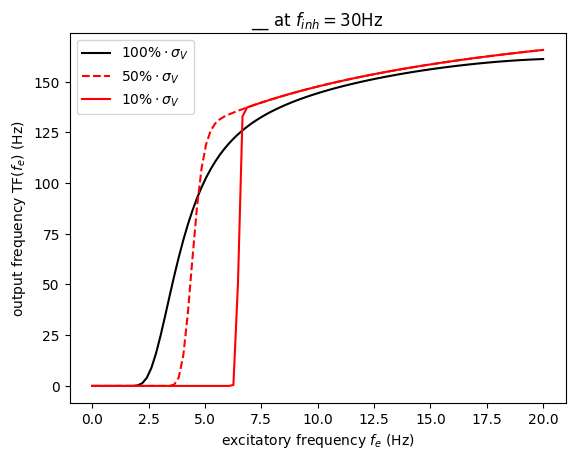

In [25]:
fe = np.linspace(0,20,100)
fi = 30
if typ=='TC':
    fout1 = TF2(PP,fe,fi,0, Nexc=800,Ninh=25,Qe=1e-9,Qi=6e-9,Cm=160e-12,El=-65e-3)
    fout2 = TF2(PP,fe,fi,0, Nexc=800,Ninh=25,Qe=1e-9,Qi=6e-9,Cm=160e-12,El=-55e-3, noise=.3)
    fout3 = TF2(PP,fe,fi,0, Nexc=800,Ninh=25,Qe=1e-9,Qi=6e-9,Cm=160e-12,El=-55e-3, noise=.1)
# PP2=PP.copy()
# PP2[2] = RE[2]
# PP2[5]*=2
# PP2[8] = RE[8]
# PP2[9] = RE[9]
if typ=='RE':
    fout1 = TF2(PP,fe,fi,0, Nexc=400,Ninh=150,Qe=4e-9,Qi=1e-9,Cm=200e-12,El=-75e-3)
    fout2 = TF2(PP,fe,fi,0, Nexc=400,Ninh=150,Qe=4e-9,Qi=1e-9,Cm=200e-12,El=-75e-3, noise=0.5)
    fout3 = TF2(PP,fe,fi,0, Nexc=400,Ninh=150,Qe=4e-9,Qi=1e-9,Cm=200e-12,El=-75e-3, noise=0.1)

plt.plot(fe,fout1,'black', label='$100\%\cdot\sigma_V$')
plt.plot(fe,fout2,'--r', label='$50\%\cdot\sigma_V$')
plt.plot(fe,fout3,'r', label='$10\%\cdot\sigma_V$')

plt.legend()
plt.xlabel("excitatory frequency $f_e$ (Hz)")
plt.ylabel("output frequency TF$(f_e)$ (Hz)")
plt.title("__ at $f_{inh}=30$Hz");
# plt.savefig("NoiseTF_TC_new.png", dpi=250)

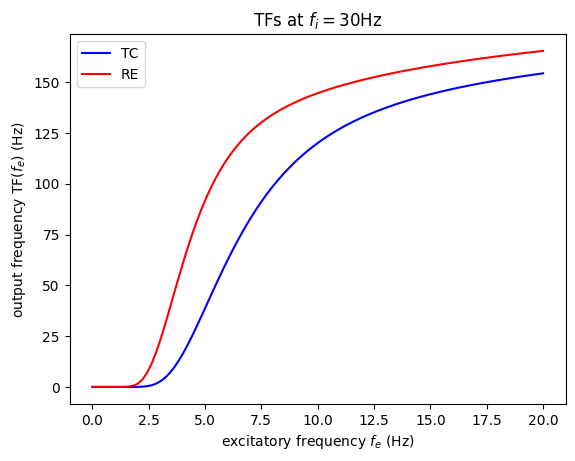

In [19]:
fe = np.linspace(0,20,100)
fi = 30
fout1 = TF2(np.load('data\\NEW6params_TC.npy'),fe,fi,0, Nexc=800,Ninh=25,Qe=1e-9,Qi=6e-9,Cm=160e-12,El=-65e-3)
fout2 = TF2(np.load('data\\NEW6params_RE.npy'),fe,fi,0, Nexc=400,Ninh=150,Qe=4e-9,Qi=1e-9,Cm=200e-12,El=-75e-3)

plt.plot(fe,fout1,'b', label='TC')
plt.plot(fe,fout2,'r', label='RE')

plt.legend()
plt.xlabel("excitatory frequency $f_e$ (Hz)")
plt.ylabel("output frequency TF$(f_e)$ (Hz)")
plt.title(f"TFs at $f_i=30$Hz");
# plt.savefig("TF.png", dpi=250)

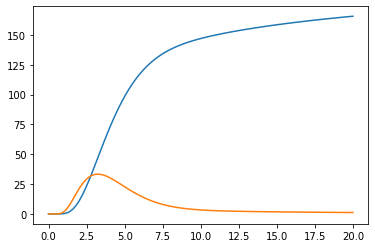

In [8]:
fe = np.linspace(0,20,100)
fi = 30
# plt.plot(fi,TF2(PP,fe,fi,0, Nexc=800,Ninh=25,Qe=1e-9,Qi=6e-9,Cm=160e-12,El=-65e-3))
plt.plot(fe,TF2(PP,fe,fi,0, Nexc=400,Ninh=150,Qe=4e-9,Qi=1e-9,Cm=200e-12,El=-75e-3))

def der(fe,fi,dfe=1e-5,dfi=0):
    # return (TF2(PP,fe+dfe/2,fi+dfi/2,0, Nexc=800,Ninh=25,Qe=1e-9,Qi=6e-9,Cm=160e-12,El=-65e-3) - TF2(PP,fe-dfe/2,fi-dfi/2,0, Nexc=800,Ninh=25,Qe=1e-9,Qi=6e-9,Cm=160e-12,El=-65e-3))/(dfe+dfi)
    return (TF2(PP,fe+dfe/2,fi+dfi/2,0, Nexc=400,Ninh=150,Qe=4e-9,Qi=1e-9,Cm=200e-12,El=-75e-3) - TF2(PP,fe-dfe/2,fi-dfi/2,0, Nexc=400,Ninh=150,Qe=4e-9,Qi=1e-9,Cm=200e-12,El=-75e-3))/(dfe+dfi)
plt.plot(fe,der(fe,fi))